# Projeto 1
### Analisando dados imobiliários

- Este projeto será feito em grupo (squad) e a nota que o squad obtiver será a nota de cada aluno do squad;
- Vocês começarão o projeto hoje e terão até o fim da aula de amanhã para concluí-lo;
- O objetivo deste projeto é que vocês pratiquem o conteúdo visto até hoje, como listas, dicionários, leitura de arquivos, etc., e trabalhem em equipe;
- Para ler os arquivos e fazer as análises, espera-se que vocês **não** utilizem bibliotecas como Pandas, Numpy ou qualquer outra que "faça todo o trabalho". Podem usar, no entanto, a math e a csv. A matplotlib será usada, mas a função já está construída: é só usar!
- É permitida a consulta do material;
- É necessário mostrar o código usado para responder todas as perguntas. Procure ser claro, comentando no código quando achar pertinente.

- Squad: Chevete
- Alunos: Jeferson Bressan, Raphael Do Prado, Vinicius Lande, Weslley dos Santos

## Contexto
Este conjunto de dados contem informações sobre aluguéis de casas/apartamentos em algumas cidades do Brasil. Esses dados foram coletados por um *webcrawler* do QuintoAndar. Sendo possível extrair informações a cerca do mercado imobiliário brasileiro.

## Conteúdo
Possui 10962 instâncias com 13 categorias. Este arquivo possui seus dados organizados pelas seguintes features:

> **city**: cidade onde o imóvel está localizada

> **area**: área do imóvel

> **rooms**: número de quartos

> **bathroom**: número de banheiros

> **parking_spaces**: número de vagas de estacionamento

> **floor**: andar no prédio

> **animal**: aceita animais ou não? (`accept` vs `not accept`)

> **furniture**: mobiliada ou não? (`furnished` vs `not furnished`)

> **hoa (R$)**: valor do condomínio

> **rent amount (R$)**: valor do aluguel

> **property tax (R$)**: valor de IPTU

> **fire insurance (R$)**: valor do seguro incêndio

> **total (R$)**: valor total do aluguel do imóvel.

## Reconhecimentos
Esse dataset foi extraído do Kaggle (https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent) e os dados foram retirados de informações disponíveis gratuitamente na internet e compilados na plataforma.

## Tarefa
Utilizando o arquivo fornecido faça a leitura dos dados e escreva um pequeno relatório respondendo as seguintes questões:

> 1) Exiba todas as cidades contidas no dataset com o percentual de imóveis oferecidos que estão localizados nela. 

> 2) Descubra a média da área e do valor do aluguel dos imóveis para cada cidade contida no dataset. O que é possível concluir a partir desse resultado?

> 3) Qual a diferença da média do valor total do aluguel entre imóveis já mobiliados e não mobiliados? 

> 4) Neste dataset, qual é a porcentagem do valor do condomínio no valor médio de aluguel total?

> 5) Use a função `plot_grafico_barra()` e faça um gráfico de barra mostrando as cinco cidades com as maiores médias de aluguel total.

In [ ]:
!pip install matplotlib

In [32]:
import matplotlib.pyplot as plt

def plot_grafico_barra(cidades, valores):
    '''
    Input:
    cidades: é uma lista de strings com os nomes das cidades
    valores: é uma lista de números com a média de aluguel para cada cidade.
    Output:
    Gera um gráfico de barra
    '''
    
    plt.bar(cidades, valores)
    plt.title('As 5 cidades com maior aluguel no Brasil')
    plt.ylabel('Aluguel médio')
    plt.show()

In [2]:
import csv
from collections import Counter

In [23]:
arquivo = open('houses_to_rent_v2.csv', 'r', encoding='utf8')

planilha = list(csv.reader(arquivo, delimiter=',', lineterminator='\n'))

arquivo.close()

In [24]:
# Requisito do professor não utilizar a biblioteca Collections
def counter(interavel):
    dic = {}
    for elemento in interavel:
        qnt = interavel.count(elemento)
        if not elemento in dic:
            dic[elemento] = qnt
    
    return dic
    

In [25]:
# Questão 1: seu código abaixo
cidades = [linha[0] for linha in planilha[1:len(planilha)]] 
total = len(cidades)

imovel_por_cidade = counter(cidades) #Cria um dicionário com o total de imóveis por cidade

porcentagem = {chave:round(((valor / total) * 100), 2) for chave, valor in imovel_por_cidade.items()} # gera o percentual por cidade

porcentagem = sorted(porcentagem.items(), key=lambda porcentagem: porcentagem[1], reverse=True)

print(porcentagem)

[('São Paulo', 55.06), ('Rio de Janeiro', 14.04), ('Belo Horizonte', 11.77), ('Porto Alegre', 11.16), ('Campinas', 7.98)]


In [26]:
def separa_cidade(cidade): 
    """
    função que faz uma lista somente com os imoveis da mesma cidade
    """
    return [linha for linha in planilha if linha[0] == cidade]

def captura_elemento(index, interavel): 
    """
    função que forma uma lista com os elementos na coluna definida em interáveis não aninhados
    """
    return [float(linha[index]) for linha in interavel]

In [27]:
# Questão 2: seu código abaixo
chaves = sorted(list(set(cidades))) # verifica as cidades presentes no csv sem repetição e põe em ordem alfabetica

def calcula_media_areas(cidade, index=1):
    dados_cidade = separa_cidade(cidade)
    areas_cidade = captura_elemento(index, dados_cidade)

    media = round(sum(areas_cidade) / len(areas_cidade), 2)
    return media

def calcula_media_alugueis(cidade, index=9):
    dados_cidade = separa_cidade(cidade)
    alugueis_cidade = captura_elemento(index, dados_cidade)

    media = round(sum(alugueis_cidade) / len(alugueis_cidade), 2)
    return media

media_areas = list(map(calcula_media_areas, chaves))
media_alugueis = list(map(calcula_media_alugueis, chaves))

junta_valores = list(zip(media_areas, media_alugueis))

area_aluguel_cidade = {}

for i in range(len(chaves)):
    area_aluguel_cidade[chaves[i]] = junta_valores[i]
    
print(area_aluguel_cidade)


{'Belo Horizonte': (207.41, 3664.13), 'Campinas': (137.56, 2364.29), 'Porto Alegre': (103.61, 2337.7), 'Rio de Janeiro': (105.35, 3232.9), 'São Paulo': (158.9, 4652.79)}


In [28]:
valor_por_metro = {k:round(v[1] / v[0], 2) for k, v in area_aluguel_cidade.items()}
    
print(valor_por_metro)

{'Belo Horizonte': 17.67, 'Campinas': 17.19, 'Porto Alegre': 22.56, 'Rio de Janeiro': 30.69, 'São Paulo': 29.28}


In [29]:
# Questão 3: seu código abaixo
def calcula_aluguel_total(mobilia):
    imoveis = [linha for linha in planilha if linha[7] == mobilia]
    aluguel_mobilia = [float(linha[12]) for linha in imoveis]
    
    media_aluguel = sum(aluguel_mobilia) / len(aluguel_mobilia)
    
    return media_aluguel

mobiliado = calcula_aluguel_total('furnished')
n_mobiliado = calcula_aluguel_total('not furnished')

diferenca = round(mobiliado - n_mobiliado, 2)

print(f'O aluguel de imóveis mobiliados custa em média R${diferenca} a mais que os não mobiliados')

O aluguel de imóveis mobiliados custa em média R$1450.57 a mais que os não mobiliados


In [34]:
# Questão 4: seu código abaixo

porcentagens = [round(float(linha[8]) / float(linha[-1]) * 100, 2) #Calcula qual a porcentagem do valor do condominio
                for linha in planilha[1:len(planilha)]]            #pelo aluguel total.

media = sum(porcentagens) / len(porcentagens)

print(f'O condominio custa em média {round(media, 2)}% do aluguel total')


O condominio custa em média 18.0% do aluguel total


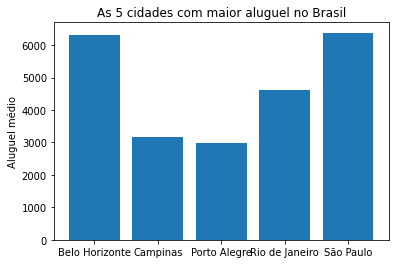

In [33]:
# Questão 5: seu código abaixo

def calc_aluguel_total(cidade, index=12):
    dados_cidade = separa_cidade(cidade)
    separa_alugueis = captura_elemento(index, dados_cidade)

    media = round(sum(separa_alugueis) / len(separa_alugueis), 2)
    return media

def plot_grafico_barra(cidades, valores):
    '''
    Input:
    cidades: é uma lista de strings com os nomes das cidades
    valores: é uma lista de números com a média de aluguel para cada cidade.
    Output:
    Gera um gráfico de barra
    '''
    
    plt.bar(cidades, valores)
    plt.title('As 5 cidades com maior aluguel no Brasil')
    plt.ylabel('Aluguel médio')
    plt.show()

aluguel_total_cidade = list(map(calc_aluguel_total, chaves))

plot_grafico_barra(chaves, aluguel_total_cidade)

# Relatório

Escreva aqui, em forma de texto corrido, um breve relatório explicando as respostas obtidas.

Temos um dataset de 10692 imóveis, distribuidos nas cidades de Belo Horizonte, Campinas, Porto Alegre, Rio de Janeiro e São Paulo, sendo mais de 50% da cidade de São Paulo. 

Os preços de aluguel por metro quadrado mais caros são os do Rio de Janeiro e São Paulo, seguidos por Porto Alegre, Belo Horizonte e Campinas.

Também podemos concluir que o preço do aluguel de imóveis mobilhados é 28% mais caro do que de imóveis não mobilhados. E que o valor gasto em condomínio é 18% do aluguel total.

